In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.datasets import copper
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

### Question 1
#### For this question we are going to use the following dataset. Write a regression model, and analyze it. Pick the smallest model and make sure that all variables you picked produce significant regression coefficients with resonable ANOVA profile.

In [36]:
from statsmodels.datasets import copper

prices = copper.data.load_pandas()
df = prices['data']
df

,WORLDCONSUMPTION,COPPERPRICE,INCOMEINDEX,ALUMPRICE,INVENTORYINDEX,TIME
0,3173.0,26.56,0.70,19.76,0.98,1.0
1,3281.1,27.31,0.71,20.78,1.04,2.0
2,3135.7,32.95,0.72,22.55,1.05,3.0
3,3359.1,33.90,0.70,23.06,0.97,4.0
4,3755.1,42.70,0.74,24.93,1.02,5.0
5,3875.9,46.11,0.74,26.50,1.04,6.0
6,3905.7,31.70,0.74,27.24,0.98,7.0
7,3957.6,27.23,0.72,26.21,0.98,8.0
8,4279.1,32.89,0.75,26.09,1.03,9.0
9,4627.9,33.78,0.77,27.40,1.03,10.0


### Solution:
#### We will build a regression model to predict world consumption of copper using some of the feautres given.
#### As it can be seen from the data, TIME and INCOMEINDEX show an increase when WORLDCONSUMPTION increases and decrease when WORLDCONSUMPTION decreases. Let's see their scatter plot.

Text(0, 0.5, 'WORLDCONSUMPTION')

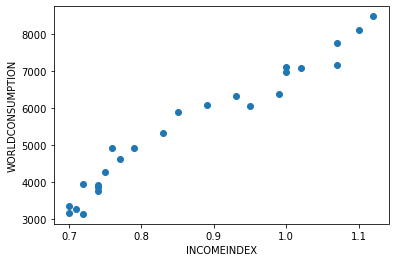

In [61]:
plt.scatter(df['INCOMEINDEX'],df['WORLDCONSUMPTION'])
plt.xlabel('INCOMEINDEX')
plt.ylabel('WORLDCONSUMPTION')

Text(0, 0.5, 'WORLDCONSUMPTION')

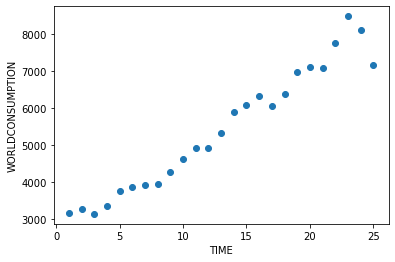

In [62]:
plt.scatter(df['TIME'],df['WORLDCONSUMPTION'])
plt.xlabel('TIME')
plt.ylabel('WORLDCONSUMPTION')

#### Scatter plots show that each of these two features can be used to fit a good regression model.

In [53]:
model_1 = ols(" WORLDCONSUMPTION ~ INCOMEINDEX", data = df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       WORLDCONSUMPTION   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     504.6
Date:                Sat, 02 Apr 2022   Prob (F-statistic):           3.79e-17
Time:                        02:29:51   Log-Likelihood:                -181.31
No. Observations:                  25   AIC:                             366.6
Df Residuals:                      23   BIC:                             369.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4365.8514    442.034     -9.877      0.000   -5280.269   -3451.434
INCOMEINDEX  1.131e+04    503.530     22.463      0.000    1.03e+04    1.24e+04
==============================================================================
Omnibus:                        0.201   Durbin-Watson:                   0.641
Prob(Omnibus):                  0.904   Jarque-Bera (JB):                0.407
Skew:                           0.007   Prob(JB):                        0.816
Kurtosis:                       2.375   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
anova_lm(model_1)

,df,sum_sq,mean_sq,F,PR(>F)
INCOMEINDEX,1.0,6.398709e+07,6.398709e+07,504.566045,3.792576e-17
Residual,23.0,2.916770e+06,1.268161e+05,NaN,NaN


In [52]:
model_2 = ols(" WORLDCONSUMPTION ~ TIME", data = df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       WORLDCONSUMPTION   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     552.7
Date:                Sat, 02 Apr 2022   Prob (F-statistic):           1.39e-17
Time:                        02:29:33   Log-Likelihood:                -180.22
No. Observations:                  25   AIC:                             364.4
Df Residuals:                      23   BIC:                             366.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2543.9940    140.560     18.099      0.000    2253.223    2834.765
TIME         222.2798      9.455     23.509      0.000     202.720     241.839
==============================================================================
Omnibus:                        4.567   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                3.398
Skew:                          -0.273   Prob(JB):                        0.183
Kurtosis:                       4.721   Cond. No.                         30.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
anova_lm(model_2)

,df,sum_sq,mean_sq,F,PR(>F)
TIME,1.0,6.423083e+07,6.423083e+07,552.672933,1.387838e-17
Residual,23.0,2.673026e+06,1.162185e+05,NaN,NaN


#### As seen, both of the features solely produce a regression model with a high R-square, i.e., they explain by good extent the varation of the response variable, WORLDCONSUMPTION. The models also show significant P-values and high sum_sq.
#### Combining these two features gives a model with a higher R-squared. However, in the combined model, the P-value for the intercept proves to not be significant which make the model problematic.

In [60]:
model_3 = ols(" WORLDCONSUMPTION ~ INCOMEINDEX + TIME", data = df).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       WORLDCONSUMPTION   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     427.2
Date:                Sat, 02 Apr 2022   Prob (F-statistic):           2.49e-18
Time:                        02:42:53   Log-Likelihood:                -174.41
No. Observations:                  25   AIC:                             354.8
Df Residuals:                      22   BIC:                             358.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -831.4015    942.545     -0.882      0.387   -2786.120    1123.317
INCOMEINDEX  5443.3083   1508.845      3.608      0.002    2314.154    8572.462
TIME          119.1501     29.596      4.026      0.001      57.772     180.529
==============================================================================
Omnibus:                        9.159   Durbin-Watson:                   1.246
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                7.820
Skew:                          -0.928   Prob(JB):                       0.0200
Kurtosis:                       5.016   Cond. No.                         480.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
anova_lm(model_3)

,df,sum_sq,mean_sq,F,PR(>F)
TIME,1.0,6.423083e+07,6.423083e+07,841.378849,5.004517e-19
INCOMEINDEX,1.0,9.935468e+05,9.935468e+05,13.014766,1.562599e-03
Residual,22.0,1.679479e+06,7.633996e+04,NaN,NaN


#### Finally, since the best model is the simplest model (prof. Kaygun) , either of model_1 or model_2 with one feature, Time or Incomeindex, as the predictor feature seems to be good enough.

### Question 2

#### Do the same for the following dataset. The first 5 columns are the explanatory variables while the last column is the target variable.

In [6]:
fish = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00504/qsar_fish_toxicity.csv',
                   sep=';',
                   header=None)
fish.columns = ["f0","f1","f2","f3","f4","f5","response"]
fish

,f0,f1,f2,f3,f4,f5,response
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390
...,...,...,...,...,...,...,...
903,2.801,0.728,2.226,0,2,0.736,3.109
904,3.652,0.872,0.867,2,3,3.983,4.040
905,3.763,0.916,0.878,0,6,2.918,4.818
906,2.831,1.393,1.077,0,1,0.906,5.317


## Solution:

#### When we take in all the feature in building our model, we get the highest R-squared.

In [22]:
model_1 = ols("response ~ f0+f1+f2+f3+f4+f5", data = fish).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     205.0
Date:                Fri, 01 Apr 2022   Prob (F-statistic):          1.33e-164
Time:                        20:59:49   Log-Likelihood:                -1238.0
No. Observations:                 908   AIC:                             2490.
Df Residuals:                     901   BIC:                             2524.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1746      0.181     12.000      0.000       1.819       2.530
f0             0.3856      0.061      6.333      0.000       0.266       0.505
f1             1.2556      0.087     14.430      0.000       1.085       1.426
f2            -0.7464      0.101     -7.365      0.000      -0.945      -0.548
f3             0.4136      0.054      7.644      0.000       0.307       0.520
f4             0.0643      0.041      1.583      0.114      -0.015       0.144
f5             0.3901      0.034     11.555      0.000       0.324       0.456
==============================================================================
Omnibus:                      100.278   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              379.239
Skew:                           0.468   Prob(JB):                     4.46e-83
Kurtosis:                       6.024   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### First of all, it can be seen that the P-value for f4 is not significant, so we consider removing it from the model. Now let's take a look at the covariance matrix, to see the linear dependence between the features. We will choose the features that have the least linear dependance.

<AxesSubplot:>

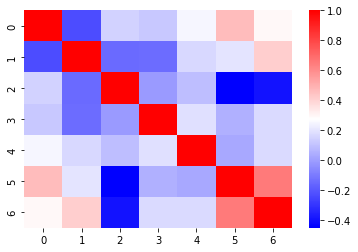

In [23]:
cor = np.corrcoef(fish.transpose())
sns.heatmap(cor,cmap='bwr')

#### From the covariance matrix, we can see the columns 1, 2, 3 and 5 have the lowest linear dependance. So we try our regression model with these features.

In [29]:
model_2 = ols("response ~ f1+f2+f3+f5", data = fish).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     277.3
Date:                Fri, 01 Apr 2022   Prob (F-statistic):          1.93e-155
Time:                        23:54:16   Log-Likelihood:                -1265.1
No. Observations:                 908   AIC:                             2540.
Df Residuals:                     903   BIC:                             2564.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6861      0.163     16.518      0.000       2.367       3.005
f1             1.0713      0.078     13.663      0.000       0.917       1.225
f2            -0.4117      0.092     -4.457      0.000      -0.593      -0.230
f3             0.4561      0.054      8.397      0.000       0.350       0.563
f5             0.5372      0.026     20.875      0.000       0.487       0.588
==============================================================================
Omnibus:                      122.055   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              410.945
Skew:                           0.630   Prob(JB):                     5.81e-90
Kurtosis:                       6.045   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
anova_lm(model_2)

,df,sum_sq,mean_sq,F,PR(>F)
f1,1.0,324.495077,324.495077,339.722707,1.222889e-64
f2,1.0,224.339285,224.339285,234.866889,2.707136e-47
f3,1.0,94.412336,94.412336,98.842838,3.586122e-22
f5,1.0,416.214680,416.214680,435.746450,2.853919e-79
Residual,903.0,862.524196,0.955176,NaN,NaN


#### As seen above, the latter model is a simpler one, but we should note that it has a lower R-suared. So eventhough it is simpler, its goodness-of-fit measure is lower meaning that it explains less variation of the response than model_1. 

#### Also, we can see from the anova table that the sum_sq for f3 is by far lower than the other three features, but again removing it causes a decrease in R-squared of the model. So the same scenario holds true; we have a simpler but less fit model, as shown below:

In [33]:
model_3 = ols("response ~ f1+f2+f5", data = fish).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     321.5
Date:                Sat, 02 Apr 2022   Prob (F-statistic):          5.11e-142
Time:                        00:17:52   Log-Likelihood:                -1299.2
No. Observations:                 908   AIC:                             2606.
Df Residuals:                     904   BIC:                             2626.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8183      0.168     16.780      0.000       2.489       3.148
f1             0.9699      0.080     12.064      0.000       0.812       1.128
f2            -0.4095      0.096     -4.271      0.000      -0.598      -0.221
f5             0.5529      0.027     20.759      0.000       0.501       0.605
==============================================================================
Omnibus:                      124.173   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.462
Skew:                           0.697   Prob(JB):                     7.91e-77
Kurtosis:                       5.706   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
anova_lm(model_3)

,df,sum_sq,mean_sq,F,PR(>F)
f1,1.0,324.495077,324.495077,315.468178,9.016907e-61
f2,1.0,224.339285,224.339285,218.098549,2.246872e-44
f5,1.0,443.283889,443.283889,430.952488,1.399069e-78
Residual,904.0,929.867323,1.028614,NaN,NaN
